In [1]:
import pandas as pd

In [2]:
spreadsheet = pd.read_csv('UNR-IDD.csv')

In [3]:
spreadsheet.columns

Index(['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
       'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
       'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
       'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label',
       'Binary Label'],
      dtype='object')

In [4]:
spreadsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [5]:
import tensorflow as tf

In [6]:
label = spreadsheet.pop('Label')
label

0         TCP-SYN
1         TCP-SYN
2         TCP-SYN
3         TCP-SYN
4         TCP-SYN
           ...   
37406    PortScan
37407    PortScan
37408    PortScan
37409    PortScan
37410    PortScan
Name: Label, Length: 37411, dtype: object

In [7]:
import numpy as np
binlabel = spreadsheet.pop('Binary Label')
binlabel

0        Attack
1        Attack
2        Attack
3        Attack
4        Attack
          ...  
37406    Attack
37407    Attack
37408    Attack
37409    Attack
37410    Attack
Name: Binary Label, Length: 37411, dtype: object

In [8]:
binlabel = [1 if x=='Attack' else 0 for x in binlabel]
binlabel = np.array(binlabel)

In [9]:
alias = {'TCP-SYN':1, 'PortScan':2, 'Overflow':3, 'Blackhole':4, 'Diversion':5, 'Normal':0}
newlabels = []
for x in label:
    l = [0, 0, 0, 0, 0, 0]
    l[alias[x]]=1
    newlabels.append(l)
label = newlabels

In [10]:
label = np.array(label)

In [11]:
label.shape

(37411, 6)

In [12]:
spreadsheet['Switch ID'] = spreadsheet['Switch ID'].replace(['of:000000000000000c', 'of:000000000000000a',
       'of:000000000000000b', 'of:0000000000000003',
       'of:0000000000000004', 'of:0000000000000001',
       'of:0000000000000002', 'of:0000000000000007',
       'of:0000000000000008', 'of:0000000000000005',
       'of:0000000000000006', 'of:0000000000000009'],[12,10,11,3,4,1,2,7,8,5,6,9])

In [13]:
spreadsheet['Port Number'] = [float(x[-1]) for x in spreadsheet['Port Number']]


In [14]:
spreadsheet['Port1']=np.zeros(len(spreadsheet))

In [15]:
spreadsheet['Port2']=np.zeros(len(spreadsheet))

In [16]:
spreadsheet['Port3']=np.zeros(len(spreadsheet))

In [17]:
spreadsheet['Port4']=np.zeros(len(spreadsheet))

In [18]:
for idx, row in spreadsheet.iterrows():
    if row['Port Number']==1.0:
        spreadsheet['Port1'].values[idx]=1
    elif row['Port Number']==2.0:
        spreadsheet['Port2'].values[idx]=1
    elif row['Port Number']==3.0:
        spreadsheet['Port3'].values[idx]=1
    elif row['Port Number']==4.0:
        spreadsheet['Port4'].values[idx]=1

In [19]:
spreadsheet.pop('Port Number')

0        1.0
1        2.0
2        3.0
3        4.0
4        1.0
        ... 
37406    2.0
37407    3.0
37408    1.0
37409    2.0
37410    3.0
Name: Port Number, Length: 37411, dtype: float64

In [20]:
spreadsheet.describe()

,Switch ID,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Port1,Port2,Port3,Port4
count,37411.000000,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.0,37411.0,37411.0,37411.0,...,3.741100e+04,37411.0,37411.000000,3.741100e+04,3.741100e+04,37411.0,37411.000000,37411.000000,37411.000000,37411.000000
mean,6.748603,21618.897169,2.647491e+07,2.451212e+07,33626.824009,911.096415,0.0,0.0,0.0,0.0,...,1.921455e+04,0.0,88.690572,1.008636e+05,1.007444e+05,-1.0,0.318168,0.316645,0.239528,0.125658
std,3.770270,65283.170126,3.703044e+07,3.439876e+07,88792.970378,982.113446,0.0,0.0,0.0,0.0,...,1.107441e+05,0.0,790.715343,2.350297e+05,2.350284e+05,0.0,0.465771,0.465174,0.426801,0.331468
min,1.000000,9.000000,7.860000e+02,5.705000e+03,41.000000,26.000000,0.0,0.0,0.0,0.0,...,-1.284277e+06,0.0,4.000000,8.700000e+01,3.700000e+01,-1.0,0.000000,0.000000,0.000000,0.000000
25%,3.000000,329.000000,9.104050e+04,5.775950e+04,347.000000,136.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,5.000000,2.367000e+03,2.272000e+03,-1.0,0.000000,0.000000,0.000000,0.000000
50%,7.000000,1170.000000,1.263052e+07,1.262658e+07,1240.000000,259.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,6.000000,7.472000e+03,7.349000e+03,-1.0,0.000000,0.000000,0.000000,0.000000
75%,10.000000,3417.000000,3.783230e+07,3.176443e+07,3968.000000,1747.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,8.000000,2.343700e+04,2.322000e+04,-1.0,1.000000,1.000000,0.000000,0.000000
max,12.000000,352772.000000,2.715925e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,...,2.004388e+06,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0,1.000000,1.000000,1.000000,1.000000


In [21]:
spreadsheet.head()

,Switch ID,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Port1,Port2,Port3,Port4
0,12,132,9181,6311853,238,46,0,0,0,0,...,True,0,9,767,688,-1,1.0,0.0,0.0,0.0
1,12,187,6304498,15713,171,46,0,0,0,0,...,True,0,9,767,688,-1,0.0,1.0,0.0,0.0
2,12,235,6311567,8030,58,46,0,0,0,0,...,True,0,9,767,688,-1,0.0,0.0,1.0,0.0
3,12,59,7878,16439,182,46,0,0,0,0,...,True,0,9,767,688,-1,0.0,0.0,0.0,1.0
4,10,188,6304547,16497,183,46,0,0,0,0,...,True,0,7,489,403,-1,1.0,0.0,0.0,0.0


In [22]:
spreadsheet.pop('Max Size')
spreadsheet.pop('Table ID')
spreadsheet.pop('Delta Packets Rx Errors')
spreadsheet.pop('Delta Packets Rx Dropped')
spreadsheet.pop('Packets Tx Errors')
spreadsheet.pop('Packets Rx Errors')
spreadsheet.pop('Packets Tx Dropped')
spreadsheet.pop('Packets Rx Dropped')
spreadsheet.pop('Delta Packets Tx Errors')
spreadsheet.pop(' Delta Packets Tx Dropped')
spreadsheet.pop('is_valid')

0        True
1        True
2        True
3        True
4        True
         ... 
37406    True
37407    True
37408    True
37409    True
37410    True
Name: is_valid, Length: 37411, dtype: bool

In [23]:
spreadsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Switch ID                      37411 non-null  int64  
 1   Received Packets               37411 non-null  int64  
 2   Received Bytes                 37411 non-null  int64  
 3   Sent Bytes                     37411 non-null  int64  
 4   Sent Packets                   37411 non-null  int64  
 5   Port alive Duration (S)        37411 non-null  int64  
 6   Delta Received Packets         37411 non-null  int64  
 7   Delta Received Bytes           37411 non-null  int64  
 8   Delta Sent Bytes               37411 non-null  int64  
 9   Delta Sent Packets             37411 non-null  int64  
 10  Delta Port alive Duration (S)  37411 non-null  int64  
 11  Connection Point               37411 non-null  int64  
 12  Total Load/Rate                37411 non-null 

In [24]:
spreadsheet = spreadsheet.reindex(columns = ['Received Packets', 'Received Bytes', 'Sent Bytes',
       'Sent Packets', 'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'Active Flow Entries', 'Packets Looked Up',
       'Packets Matched', 'Switch ID', 'Connection Point', 'Port1', 'Port2', 'Port3', 'Port4'])

In [25]:
spreadsheet = spreadsheet.apply(pd.to_numeric)
spreadsheet=spreadsheet.astype(np.float32)
tf.convert_to_tensor(spreadsheet)

<tf.Tensor: shape=(37411, 24), dtype=float32, numpy=
array([[1.3200000e+02, 9.1810000e+03, 6.3118530e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.8700000e+02, 6.3044980e+06, 1.5713000e+04, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3500000e+02, 6.3115670e+06, 8.0300000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0420000e+03, 2.5252012e+07, 7.8569760e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4901200e+05, 1.4360115e+07, 2.9509000e+04, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2800000e+02, 3.0377000e+04, 2.5258600e+07, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [26]:
import sklearn.model_selection as sk
X_train, X_test, Y_train, Y_test = sk.train_test_split(spreadsheet, label, test_size=0.1)

In [27]:
Y_train

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [28]:
X_train.shape

(33669, 24)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33669 entries, 1442 to 28566
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Received Packets               33669 non-null  float32
 1   Received Bytes                 33669 non-null  float32
 2   Sent Bytes                     33669 non-null  float32
 3   Sent Packets                   33669 non-null  float32
 4   Port alive Duration (S)        33669 non-null  float32
 5   Delta Received Packets         33669 non-null  float32
 6   Delta Received Bytes           33669 non-null  float32
 7   Delta Sent Bytes               33669 non-null  float32
 8   Delta Sent Packets             33669 non-null  float32
 9   Delta Port alive Duration (S)  33669 non-null  float32
 10  Total Load/Rate                33669 non-null  float32
 11  Total Load/Latest              33669 non-null  float32
 12  Unknown Load/Rate              33669 non-nu

In [30]:
X_train.shape

(33669, 24)

In [31]:
import keras.backend as K

from tensorflow.keras.layers import Input, Normalization, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model

def get_advanced_model():
    num_features = 18
    cat_features = 6  

    num_input = Input(shape=(num_features,), name='numerical_input')
    cat_input = Input(shape=(cat_features,), name='categorical_input')

    normalizer = Normalization()(num_input)

    combined_features = Concatenate()([normalizer, cat_input])

    hidden_layer1 = Dense(512, activation='relu')(combined_features)
    dropout1 = Dropout(0.4)(hidden_layer1)
    hidden_layer2 = Dense(256, activation='relu')(dropout1)
    dropout2 = Dropout(0.3)(hidden_layer2)
    hidden_layer3 = Dense(128, activation='relu')(dropout2)
    dropout3 = Dropout(0.2)(hidden_layer3)
    hidden_layer4 = Dense(64, activation='relu')(dropout3)
    output_layer = Dense(6, activation='softmax')(hidden_layer4)

    model = Model(inputs=[num_input, cat_input], outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    return model


def get_model2():
    num_features = 18  
    cat_features = 6   

    num_input = Input(shape=(num_features,), name='numerical_input')
    cat_input = Input(shape=(cat_features,), name='categorical_input')

    normalizer = Normalization()(num_input)

    combined_features = Concatenate()([normalizer, cat_input])

    hidden_layer1 = Dense(256, activation='relu')(combined_features)
    dropout1 = Dropout(0.4)(hidden_layer1)
    hidden_layer2 = Dense(128, activation='relu')(dropout1)
    dropout2 = Dropout(0.2)(hidden_layer2)
    hidden_layer3 = Dense(64, activation='relu')(dropout2)
    output_layer = Dense(6, activation='softmax')(hidden_layer3)

    model = Model(inputs=[num_input, cat_input], outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    return model


def get_model3():
    num_features = 18  
    cat_features = 6  

    num_input = Input(shape=(num_features,), name='numerical_input')
    cat_input = Input(shape=(cat_features,), name='categorical_input')

    normalizer = Normalization()(num_input)

    combined_features = Concatenate()([normalizer, cat_input])

    hidden_layer1 = Dense(64, activation='relu')(combined_features)
    dropout1 = Dropout(0.2)(hidden_layer1)
    hidden_layer2 = Dense(64, activation='relu')(dropout1)
    hidden_layer3 = Dense(64, activation='relu')(hidden_layer2)
    hidden_layer4 = Dense(64, activation='relu')(hidden_layer3)
    hidden_layer5 = Dense(64, activation='relu')(hidden_layer4)
    dropout2 = Dropout(0.1)(hidden_layer5)
    hidden_layer6 = Dense(64, activation='relu')(dropout2)
    output_layer = Dense(6, activation='softmax')(hidden_layer6)

    model = Model(inputs=[num_input, cat_input], outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    return model

In [32]:
model = get_advanced_model()
normalizer = model.layers[1]
normalizer.adapt(X_train.iloc[:,:18])
history = model.fit({'numerical_input': X_train.iloc[:,:18], 'categorical_input': X_train.iloc[:,18:]},Y_train,epochs=180,batch_size=32, validation_split=0.1)

Epoch 1/180
947/947 [==============================] - 3s 3ms/step - loss: 0.7142 - accuracy: 0.6918 - val_loss: 0.4303 - val_accuracy: 0.8396
Epoch 2/180
947/947 [==============================] - 3s 3ms/step - loss: 0.4664 - accuracy: 0.8091 - val_loss: 0.3798 - val_accuracy: 0.8429
Epoch 3/180
947/947 [==============================] - 3s 3ms/step - loss: 0.4137 - accuracy: 0.8325 - val_loss: 0.3395 - val_accuracy: 0.8592
Epoch 4/180
947/947 [==============================] - 3s 3ms/step - loss: 0.3797 - accuracy: 0.8466 - val_loss: 0.3214 - val_accuracy: 0.8684
Epoch 5/180
947/947 [==============================] - 3s 3ms/step - loss: 0.3648 - accuracy: 0.8498 - val_loss: 0.2963 - val_accuracy: 0.8773
Epoch 6/180
947/947 [==============================] - 4s 4ms/step - loss: 0.3488 - accuracy: 0.8546 - val_loss: 0.3086 - val_accuracy: 0.8705
Epoch 7/180
947/947 [==============================] - 4s 4ms/step - loss: 0.3408 - accuracy: 0.8553 - val_loss: 0.3056 - val_accuracy: 0.8753

In [33]:
model.evaluate({'numerical_input': X_test.iloc[:,:18], 'categorical_input': X_test.iloc[:,18:]},Y_test)

117/117 [==============================] - 0s 1ms/step - loss: 0.2185 - accuracy: 0.8985


[0.2185387760400772, 0.8984500169754028]

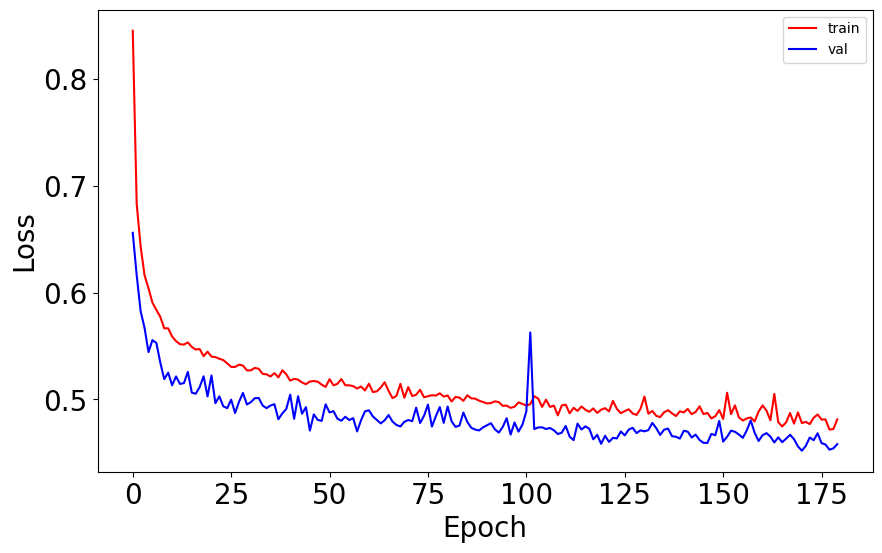

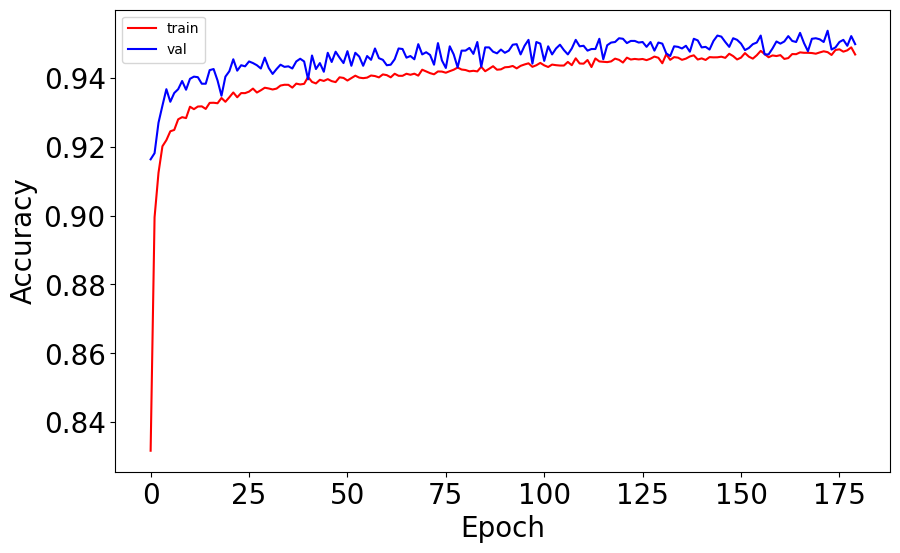

In [34]:
import matplotlib.pyplot as plt
def plot_history(lr_model_history):

    fig, ax = plt.subplots(1, 1, figsize=(10,6))
    ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
    ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
    ax.set_xlabel(r'Epoch', fontsize=20)
    ax.set_ylabel(r'Loss', fontsize=20)
    ax.legend()
    ax.tick_params(labelsize=20)

    fig, ax = plt.subplots(1, 1, figsize=(10,6))
    ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='train')
    ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='val')
    ax.set_xlabel(r'Epoch', fontsize=20)
    ax.set_ylabel(r'Accuracy', fontsize=20)
    ax.legend()
    ax.tick_params(labelsize=20)
plot_history(history)

In [35]:
model2 = get_model2()
normalizer = model2.layers[1]
normalizer.adapt(X_train.iloc[:,:18])
history2 = model2.fit({'numerical_input': X_train.iloc[:,:18], 'categorical_input': X_train.iloc[:,18:]},Y_train,epochs=300,batch_size=32, validation_split=0.1, use_multiprocessing=True)

Epoch 1/300
947/947 [==============================] - 3s 2ms/step - loss: 1.1791 - accuracy: 0.5016 - val_loss: 0.7852 - val_accuracy: 0.6718
Epoch 2/300
947/947 [==============================] - 2s 2ms/step - loss: 0.8255 - accuracy: 0.6326 - val_loss: 0.6999 - val_accuracy: 0.7137
Epoch 3/300
947/947 [==============================] - 2s 2ms/step - loss: 0.7529 - accuracy: 0.6666 - val_loss: 0.6425 - val_accuracy: 0.7389
Epoch 4/300
947/947 [==============================] - 2s 2ms/step - loss: 0.6980 - accuracy: 0.6954 - val_loss: 0.5918 - val_accuracy: 0.7669
Epoch 5/300
947/947 [==============================] - 2s 2ms/step - loss: 0.6532 - accuracy: 0.7194 - val_loss: 0.5503 - val_accuracy: 0.7841
Epoch 6/300
947/947 [==============================] - 2s 2ms/step - loss: 0.6074 - accuracy: 0.7410 - val_loss: 0.5126 - val_accuracy: 0.7951
Epoch 7/300
947/947 [==============================] - 2s 2ms/step - loss: 0.5739 - accuracy: 0.7603 - val_loss: 0.4779 - val_accuracy: 0.8081

947/947 [==============================] - 2s 3ms/step - loss: 0.2020 - accuracy: 0.9066 - val_loss: 0.1858 - val_accuracy: 0.9130
Epoch 228/300
947/947 [==============================] - 2s 3ms/step - loss: 0.2040 - accuracy: 0.9079 - val_loss: 0.1828 - val_accuracy: 0.9145
Epoch 229/300
947/947 [==============================] - 2s 3ms/step - loss: 0.2025 - accuracy: 0.9082 - val_loss: 0.1901 - val_accuracy: 0.9061
Epoch 230/300
947/947 [==============================] - 2s 3ms/step - loss: 0.2023 - accuracy: 0.9063 - val_loss: 0.1848 - val_accuracy: 0.9210
Epoch 231/300
947/947 [==============================] - 2s 2ms/step - loss: 0.2012 - accuracy: 0.9080 - val_loss: 0.1879 - val_accuracy: 0.9159
Epoch 232/300
947/947 [==============================] - 2s 3ms/step - loss: 0.2023 - accuracy: 0.9059 - val_loss: 0.1850 - val_accuracy: 0.9133
Epoch 233/300
947/947 [==============================] - 2s 2ms/step - loss: 0.2034 - accuracy: 0.9040 - val_loss: 0.1869 - val_accuracy: 0.9174

In [36]:
model2.evaluate({'numerical_input': X_test.iloc[:,:18], 'categorical_input': X_test.iloc[:,18:]},Y_test)

117/117 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9134


[0.19677534699440002, 0.9134153127670288]

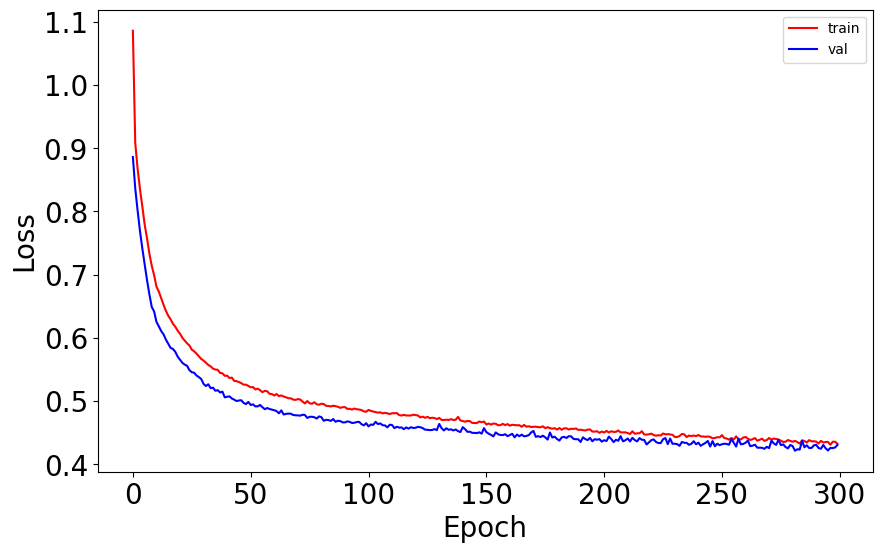

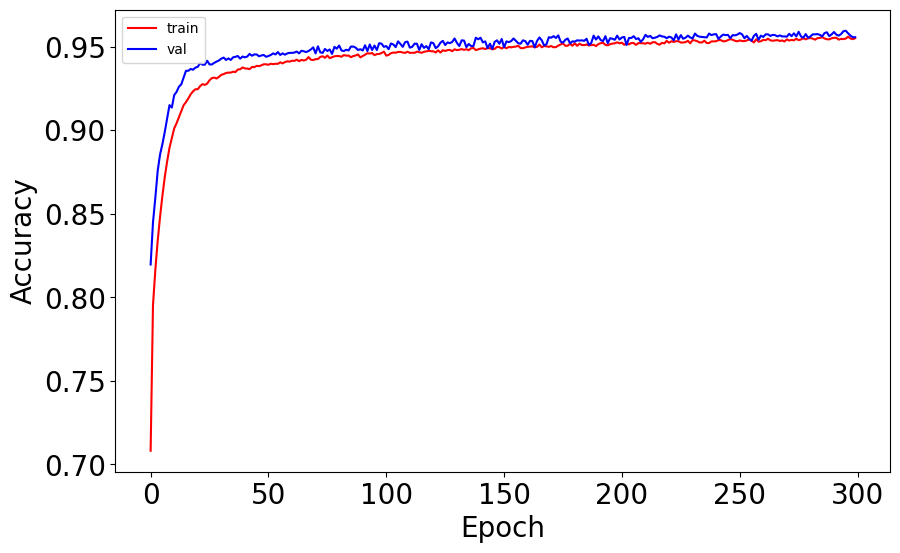

In [37]:
plot_history(history2)

117/117 [==============================] - 0s 1ms/step - loss: 1.3574 - accuracy: 0.8437


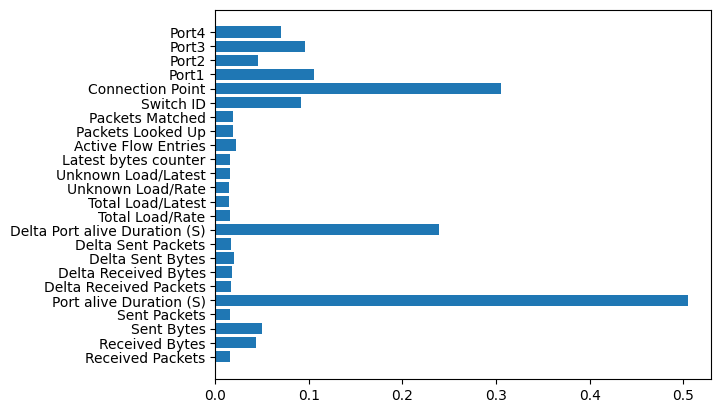

In [38]:
X_test2 = X_test.copy(deep=True)
feature_acc = {}
base = model2.evaluate({'numerical_input': X_test.iloc[:,:18], 'categorical_input': X_test.iloc[:,18:]},Y_test)[1]

for column in X_test2:
    X_test2[column] = np.zeros(len(X_test2[column]))
    feature_acc[column]= base - model.evaluate({'numerical_input':X_test2.iloc[:,:18], 'categorical_input':X_test2.iloc[:,18:]},Y_test)[1]
    X_test2 = X_test.copy(deep=True)

names = list(feature_acc.keys())
values = list(feature_acc.values())
plt.barh(range(len(feature_acc)), values, tick_label=names)
plt.show()

In [39]:
model3 = get_model3()
normalizer = model3.layers[1]
normalizer.adapt(X_train.iloc[:,:18])
history3 = model3.fit({'numerical_input': X_train.iloc[:,:18], 'categorical_input': X_train.iloc[:,18:]},Y_train,epochs=250,batch_size=32, validation_split=0.1, use_multiprocessing=True)

Epoch 1/250
947/947 [==============================] - 3s 2ms/step - loss: 1.1612 - accuracy: 0.5009 - val_loss: 0.8067 - val_accuracy: 0.6433
Epoch 2/250
947/947 [==============================] - 2s 2ms/step - loss: 0.8334 - accuracy: 0.6219 - val_loss: 0.7132 - val_accuracy: 0.6843
Epoch 3/250
947/947 [==============================] - 2s 2ms/step - loss: 0.7672 - accuracy: 0.6560 - val_loss: 0.6664 - val_accuracy: 0.7152
Epoch 4/250
947/947 [==============================] - 2s 2ms/step - loss: 0.7245 - accuracy: 0.6800 - val_loss: 0.6350 - val_accuracy: 0.7318
Epoch 5/250
947/947 [==============================] - 2s 2ms/step - loss: 0.6935 - accuracy: 0.6926 - val_loss: 0.5975 - val_accuracy: 0.7446
Epoch 6/250
947/947 [==============================] - 2s 2ms/step - loss: 0.6711 - accuracy: 0.7079 - val_loss: 0.5730 - val_accuracy: 0.7633
Epoch 7/250
947/947 [==============================] - 2s 2ms/step - loss: 0.6364 - accuracy: 0.7231 - val_loss: 0.5416 - val_accuracy: 0.7731

947/947 [==============================] - 2s 2ms/step - loss: 0.2039 - accuracy: 0.9032 - val_loss: 0.1919 - val_accuracy: 0.9136
Epoch 228/250
947/947 [==============================] - 2s 2ms/step - loss: 0.2066 - accuracy: 0.9038 - val_loss: 0.1896 - val_accuracy: 0.9142
Epoch 229/250
947/947 [==============================] - 2s 2ms/step - loss: 0.2038 - accuracy: 0.9030 - val_loss: 0.1865 - val_accuracy: 0.9174
Epoch 230/250
947/947 [==============================] - 2s 2ms/step - loss: 0.2050 - accuracy: 0.9047 - val_loss: 0.1879 - val_accuracy: 0.9165
Epoch 231/250
947/947 [==============================] - 2s 2ms/step - loss: 0.2041 - accuracy: 0.9050 - val_loss: 0.1958 - val_accuracy: 0.9145
Epoch 232/250
947/947 [==============================] - 2s 2ms/step - loss: 0.2074 - accuracy: 0.9034 - val_loss: 0.1931 - val_accuracy: 0.9100
Epoch 233/250
947/947 [==============================] - 2s 2ms/step - loss: 0.2047 - accuracy: 0.9039 - val_loss: 0.1982 - val_accuracy: 0.9059

In [40]:
model3.evaluate({'numerical_input': X_test.iloc[:,:18], 'categorical_input': X_test.iloc[:,18:]},Y_test)

117/117 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9065


[0.20446042716503143, 0.9064671397209167]

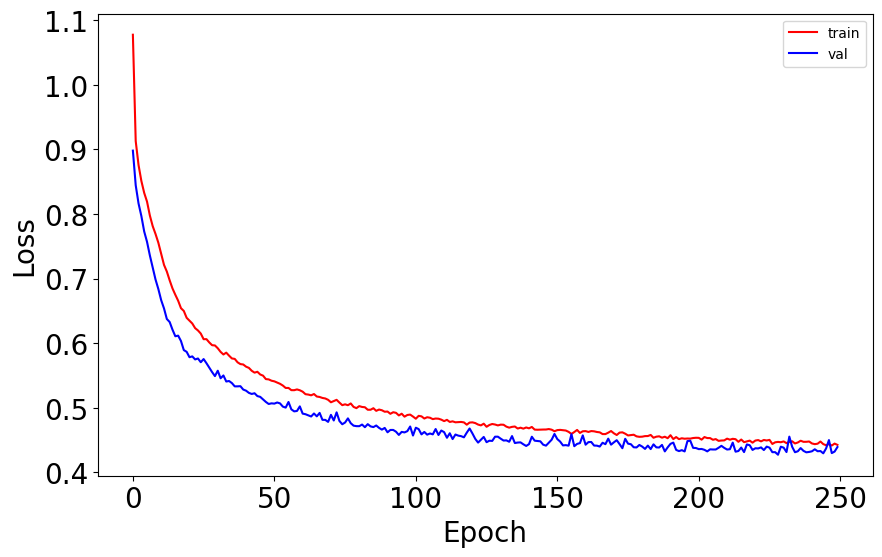

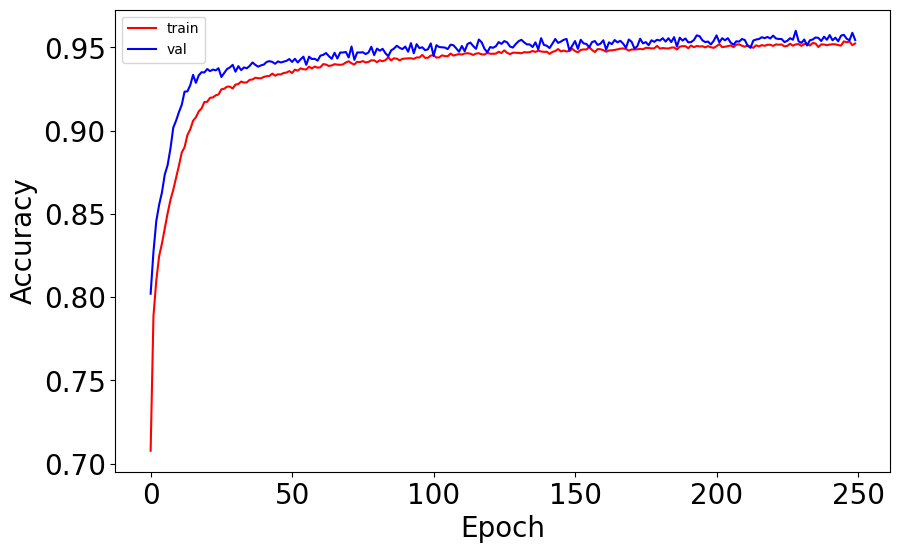

In [41]:
plot_history(history3)

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=250)
clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=250)

In [43]:
from sklearn.metrics import accuracy_score

clf_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, clf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9331908070550508


In [44]:
def weighted_ensambling(weights,predictions_set):
    
    suma=[]
    
    for i in range(0,len(predictions_set[0])):
        s = predictions_set[0][i]*weights[0]
        for w in range(1,len(weights)):
            s = s + predictions_set[w][i]*weights[w]
        suma.append(s)
    suma=np.array(suma)
    return suma

In [45]:
weights_arr = [0.1, 0.3, 0.2, 0.4]

In [46]:
from sklearn.metrics import accuracy_score, classification_report
models= [model, model2, model3, clf]
predictions_set = [model.predict({'numerical_input':X_test.iloc[:,:18], 'categorical_input':X_test.iloc[:,18:]}) for model in models[:-1]] 
predictions_set.append(clf.predict(X_test))
predictions = weighted_ensambling(weights_arr,predictions_set)

117/117 [==============================] - 0s 763us/step


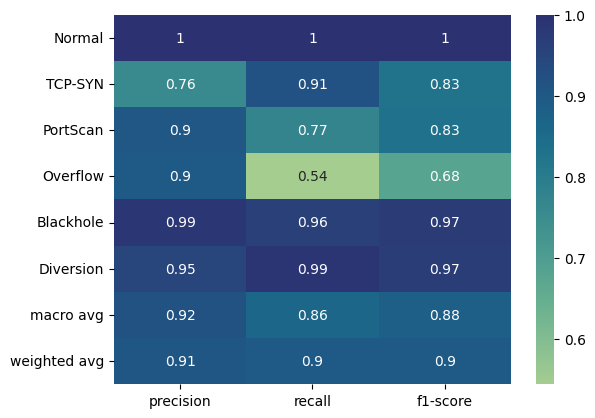

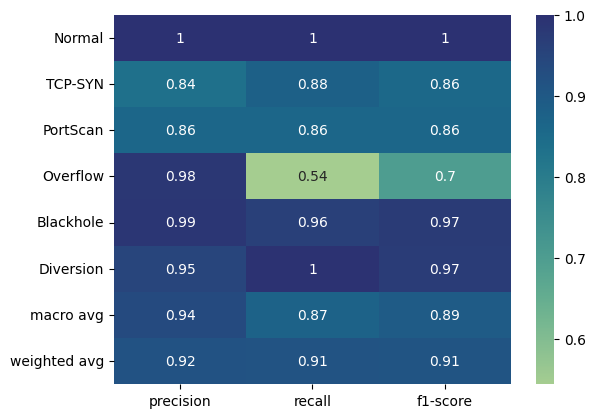

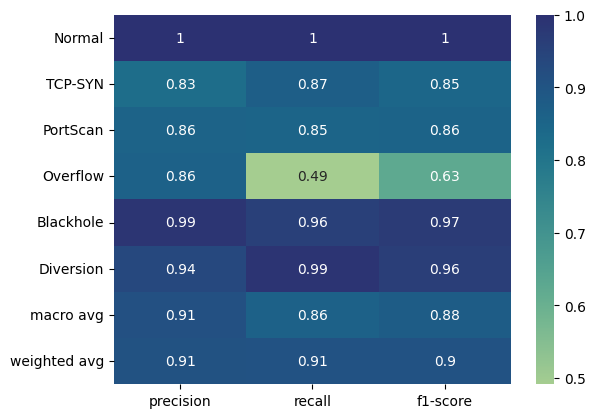

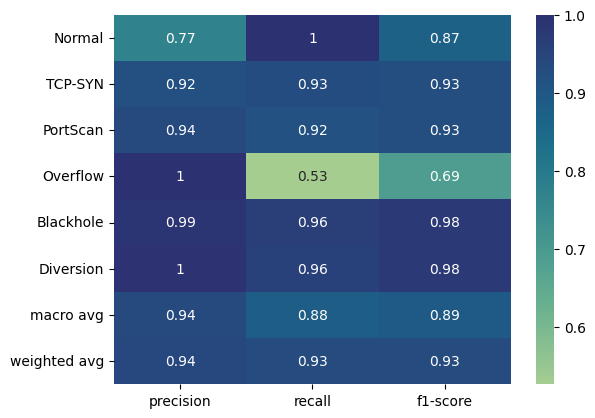

In [47]:
import seaborn as sns

real_y = [np.argmax(x) for x in Y_test]
for model_prediction in predictions_set:
    argmaxed = [np.argmax(x) for x in model_prediction]
    report = classification_report(real_y,argmaxed, target_names=['Normal','TCP-SYN','PortScan','Overflow','Blackhole','Diversion'], output_dict=True)
    report.pop('accuracy')
    plt.figure()
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='crest')

In [48]:
yhats = np.array(predictions)

In [49]:
outcomes = [np.argmax(x) for x in yhats]
print("Weighted ensembling accuracy: ",accuracy_score(outcomes,real_y))

Weighted ensembling accuracy:  0.9481560662747194


In [50]:
from sklearn.metrics import classification_report

print(classification_report(real_y,outcomes, target_names=['Normal','TCP-SYN','PortScan','Overflow','Blackhole','Diversion']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       387
     TCP-SYN       0.90      0.94      0.92       870
    PortScan       0.92      0.93      0.93       956
    Overflow       1.00      0.62      0.77       114
   Blackhole       0.99      0.97      0.98       856
   Diversion       0.96      0.99      0.98       559

    accuracy                           0.95      3742
   macro avg       0.96      0.91      0.93      3742
weighted avg       0.95      0.95      0.95      3742



<Axes: >

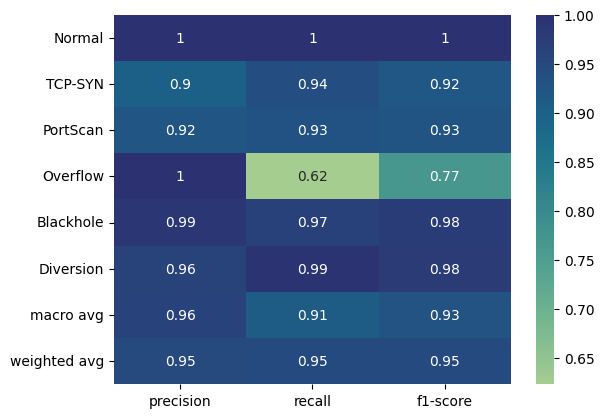

In [51]:
import seaborn as sns
report = classification_report(real_y,outcomes, target_names=['Normal','TCP-SYN','PortScan','Overflow','Blackhole','Diversion'], output_dict=True)
report.pop('accuracy')
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='crest')

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(real_y, outcomes)

array([[387,   0,   0,   0,   0,   0],
       [  0, 817,  51,   0,   2,   0],
       [  0,  67, 889,   0,   0,   0],
       [  0,   6,   8,  71,   8,  21],
       [  0,  14,  14,   0, 828,   0],
       [  0,   3,   0,   0,   0, 556]], dtype=int64)